In [3]:
from sklearn.datasets import make_blobs 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class CustomKNN:
    
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict_point(self, point):
        dist = np.power(self.X - point, 2).sum(axis=1)
        closestk = np.argsort(dist)[:self.k]
        votes = self.y[closestk]
        uniques, freq = np.unique(votes, return_counts=True)
        return uniques[freq.argmax()]
        
        
    def predict(self, X):
        
        results = []
        
        for point in X:
            results.append(self.predict_point(point))
            
        return np.array(results)
    
    
    def score(self, X, y):
        
        yp = self.predict(X)
        return (y==yp).mean()


In [9]:
import pandas as pd
df = pd.read_csv("../datasets/mnist_train_small.csv", header=None)

In [10]:
data = df.values

In [11]:
data.shape

(20000, 785)

In [14]:
X = data[:, 1:]
y = data[:, 0]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
img = X[104].reshape(28, 28)

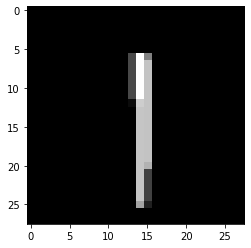

In [38]:
plt.imshow(img, cmap="gray")

In [39]:
model = CustomKNN(5)

In [41]:
model.fit(X_train, y_train)

In [42]:
y_test[:20]

array([9, 5, 2, 6, 6, 0, 0, 0, 9, 8, 9, 6, 2, 5, 0, 3, 9, 2, 6, 2])

In [44]:
yp = model.predict(X_test[:20])

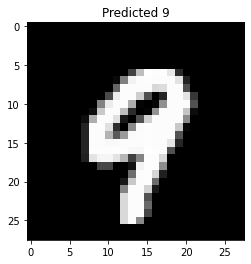

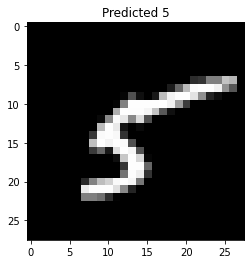

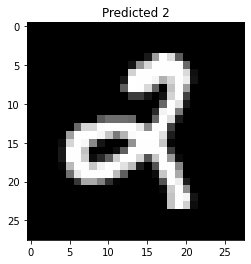

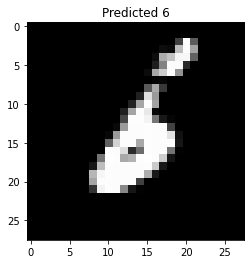

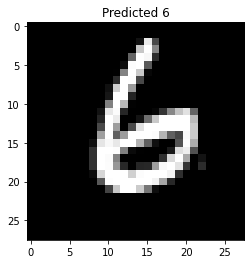

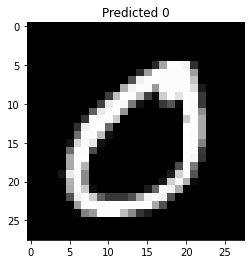

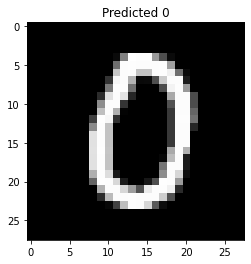

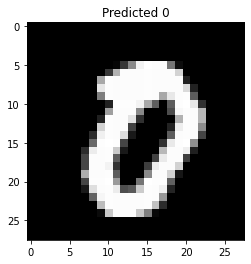

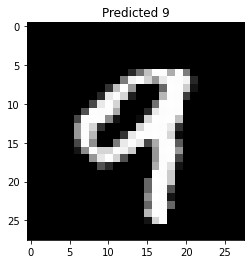

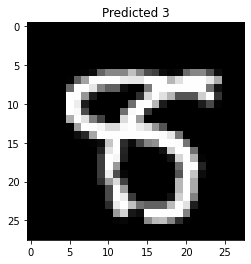

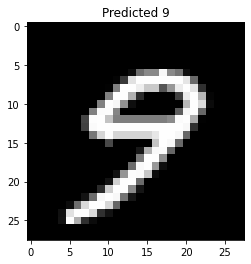

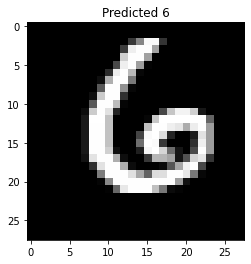

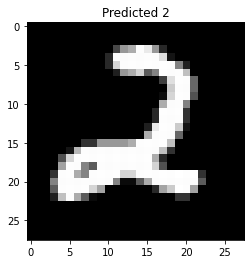

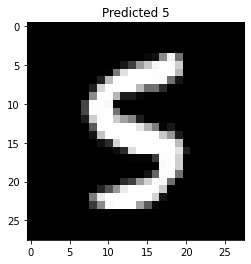

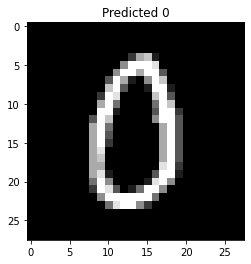

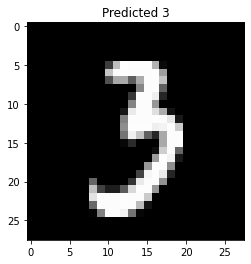

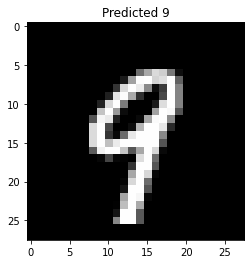

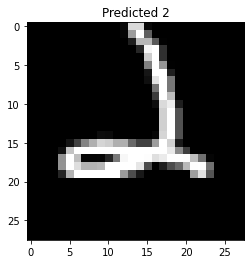

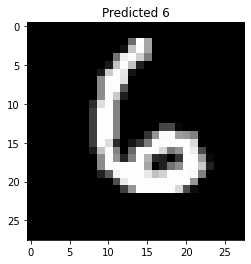

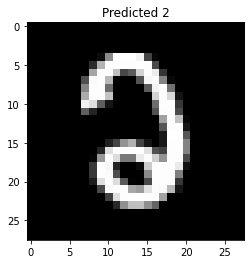

In [45]:
for img_flat, prediction in zip(X_test[:20], yp):
    
    plt.figure()
    plt.imshow(img_flat.reshape(28, 28), cmap="gray")
    plt.title("Predicted " + str(prediction))
    plt.show()

In [79]:
model.score(X_test, y_test)

0.98

In [33]:
# from keras.datasets import mnist

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model = KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the sa

In [ ]:
model = KNeighborsClassifier